# Please type your student ID: 111522071

# HW3-1: Simple Linear Regression

In [8]:
#Import data analysis Library
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import io

# Visualization Library
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine Learning Library
import sklearn

# Three digits after decimal point
%precision 3



'%.3f'

Regression Coefficient: [-0.064]
Intercept: 12.138800862687443
Coefficient of Determination: 0.008350131955637385


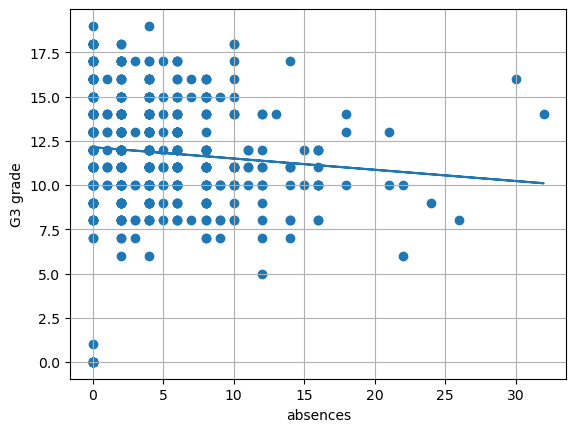

In [44]:
from sklearn import linear_model

#read csv
student_data_math = pd.read_csv("student-por.csv",sep=';')
student_data_math = student_data_math[['G3','absences']]

#linear model
reg = linear_model.LinearRegression()

#train
X = student_data_math.loc[:,['absences']].values
Y = student_data_math['G3'].values

reg.fit(X,Y)

print("Regression Coefficient:",reg.coef_)
print("Intercept:",reg.intercept_)
print("Coefficient of Determination:",reg.score(X,Y))

#plot
plt.scatter(X,Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')
plt.plot(X,reg.predict(X))
plt.grid()
plt.show()

# HW3-2: Mutiple Linear Regression

In [25]:
#Import data analysis Library
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# Visualization Library
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine Learning Library
import sklearn

# Three digits after decimal point
%precision 3

'%.3f'

In [21]:
import requests, zipfile
import io

# Read car selling data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# Make the data be DataFrame
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

print(auto)

# Set tages in the data column
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

     0    1            2       3      4     5            6    7      8   \
0     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
1     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
2     1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164         audi     gas    std  four        sedan  fwd  front   
4     2  164         audi     gas    std  four        sedan  4wd  front   
..   ..  ...          ...     ...    ...   ...          ...  ...    ...   
200  -1   95        volvo     gas    std  four        sedan  rwd  front   
201  -1   95        volvo     gas  turbo  four        sedan  rwd  front   
202  -1   95        volvo     gas    std  four        sedan  rwd  front   
203  -1   95        volvo  diesel  turbo  four        sedan  rwd  front   
204  -1   95        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...   16    17    18    19    20   21    22  23  24     25  
0     88.6  ...  130  mpfi

In [27]:
print('Dimension of Data:{}'.format(auto.shape))

Dimension of Data:(205, 26)


In [28]:
# Show the first 5 rows
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
# Count the number of “?” in the dataframe.
auto = auto[['price','width','engine-size']]
auto.isin(['?']).sum()

price          4
width          0
engine-size    0
dtype: int64

In [30]:
# Replace “?” to NaN and delete the row.
auto = auto.replace('?',np.nan).dropna()
print('Dimension of Data:{}'.format(auto.shape))

Dimension of Data:(201, 3)


In [35]:
print('Data Type（Before Change）\n{}\n'.format(auto.dtypes))

Data Type（Before Change）
price            int64
width          float64
engine-size      int64
dtype: object



In [36]:
# Data Type Change
auto = auto.assign(price = pd.to_numeric(auto.price))
auto = auto.assign(width = pd.to_numeric(auto.width))
print('Data Type（After Change）\n{}'.format(auto.dtypes))

Data Type（After Change）
price            int64
width          float64
engine-size      int64
dtype: object


In [37]:
# Observe the Correlation
auto.corr()

,price,width,engine-size
price,1.000000,0.751265,0.872335
width,0.751265,1.000000,0.729436
engine-size,0.872335,0.729436,1.000000


In [38]:
# Import Data Split Library
from sklearn.model_selection import train_test_split

# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Specify target variable as price. Other variables are explanatory variables.
X = auto.drop('price',axis = 1)
Y = auto['price']

# Split trainset and testset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state = 0)

# Initialize Multiple Linear Regression Model and Train Model
model = LinearRegression()
model.fit(X_train,Y_train)

# Print Coefficient of Determination 
print('Coefficient of Determination (train):{:.3f}'.format(model.score(X_train,Y_train)))
print('Coefficient of Determination (test):{:.3f}'.format(model.score(X_test,Y_test)))
 
# Regression Coefficient and Intercept
print('\nRegression Coefficient\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('Intercept: {:.3f}'.format(model.intercept_))

Coefficient of Determination (train):0.783
Coefficient of Determination (test):0.778

Regression Coefficient
width          1261.735518
engine-size     109.526787
dtype: float64
Intercept: -84060.643
